In [1]:
pip install ijson


Note: you may need to restart the kernel to use updated packages.


In [74]:
!pip install liwc
!pip install liwc-text-analysis

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.



  Attempting uninstall: attrs
    Found existing installation: attrs 20.3.0
    Uninstalling attrs-20.3.0:
      Successfully uninstalled attrs-20.3.0
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.5
    Uninstalling wcwidth-0.2.5:
      Successfully uninstalled wcwidth-0.2.5
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7
  Attempting uninstall: more-itertools
    Found existing installation: more-itertools 8.6.0
    Uninstalling more-itertools-8.6.0:
      Successfully uninstalled more-itertools-8.6.0
  Attempting uninstall: zipp
    Found existing installation: zipp 3.4.0
    Uninstalling zipp-3.4.0:
      Successfully uninstalled zipp-3.4.0
  Attempting uninstall: importlib-metadata
    Found exis

In [81]:
!pip install nltk

In [76]:
!pip install liwc-analysis

In [1]:
import ijson
import pandas as pd
import numpy as np
import re
import string

In [2]:
file_name='C:/Users/Fannie/Desktop/yelp_academic_dataset_review.json'

def extract_json(filename):
    with open(filename, 'rb') as input_file:
        return list(ijson.items(input_file, 'records.item', use_float=True))

extract_json(file_name)

In [ ]:
#list(ijson.parse(open(file_name,encoding="utf8"),multiple_values=True))

In [3]:
with open(file_name,encoding="utf8") as file:

    parser = ijson.parse(file, multiple_values=True)
    review_id = []
    user_id = []
    business_id = []
    stars = []
    useful = []
    funny = []
    cool = []
    text = []
    date = []
    
    for prefix, event, value in parser:

        #for i in ['review_id', 'user_id', 'business_id', 'stars', "useful", "funny", "cool", "text", "date"]:
            
        #   if prefix==i:
        #   i.append(value)
            
        if prefix=="review_id":
            review_id.append(value)

        if prefix=="user_id":
            user_id.append(value)

        if prefix=="useful":
            useful.append(value)
            
        if prefix=="business_id":
            business_id.append(value)

        if prefix=="stars":
            stars.append(value)

        if prefix=="funny":
            funny.append(value)

        if prefix=="cool":
            cool.append(value)

        if prefix=="text":
            text.append(value)

        if prefix=="date":
            date.append(value)


In [8]:
Review1 = pd.DataFrame({'review_id':review_id, 'user_id':user_id, 'business_id':business_id, 'stars':stars, 
                        'useful':useful, 'funny':funny, 'cool':cool, 'text':text, 'date':date})

In [13]:
Review1.to_csv('C:/Users/Fannie/Desktop/yelpreview.csv')

In [11]:
Review1.head(20)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
5,J4a2TuhDasjn2k3wWtHZnQ,RNm_RWkcd02Li2mKPRe7Eg,xGXzsc-hzam-VArK6eTvtw,1.0,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21 04:41:03
6,28gGfkLs3igtjVy61lh77Q,Q8c91v7luItVB0cMFF_mRA,EXOsmAB1s71WePlQk0WZrA,2.0,0,0,0,"The setting is perfectly adequate, and the foo...",2006-04-16 02:58:44
7,9vqwvFCBG3FBiHGmOHMmiA,XGkAG92TQ3MQUKGX9sLUhw,DbXHNl890xSXNiyRczLWAg,5.0,0,0,0,Probably one of the better breakfast sandwiche...,2017-12-02 18:16:13
8,2l_TDrQ7p-5tANOyiOlkLQ,LWUnzwK0ILquLLZcHHE1Mw,mD-A9KOWADXvfrZfwDs-jw,4.0,1,0,0,I am definitely a fan of Sports Authority. Th...,2012-05-28 15:00:47
9,KKVFopqzcVfcubIBxmIjVA,99RsBrARhhx60UnAC4yDoA,EEHhKSxUvJkoPSzeGKkpVg,5.0,0,0,0,I work in the Pru and this is the most afforda...,2014-05-07 18:10:21


In [12]:
Review1.describe()

,useful,funny,cool
count,8.635403e+06,8.635403e+06,8.635403e+06
mean,1.249294e+00,4.194358e-01,5.022635e-01
std,3.204236e+00,1.869675e+00,2.244378e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00
max,7.580000e+02,6.100000e+02,7.320000e+02


In [15]:
pd.set_option('display.max_rows', 500)
pd.value_counts(Review1.useful)

0      4758168
1      1827011
2       839327
3       433797
4       242723
5       147582
6        95333
7        64456
8        46308
9        34071
10       25761
11       19563
12       15718
13       12815
14       10129
15        8337
16        7077
17        5888
18        4800
19        4139
20        3467
21        2930
22        2514
23        2257
24        1924
25        1689
26        1502
27        1323
28        1157
29         998
30         925
31         865
32         688
33         639
34         578
35         523
36         486
37         451
38         423
39         389
40         342
41         334
43         290
44         285
42         281
45         251
46         236
47         225
50         184
48         174
49         169
55         156
53         147
51         146
52         141
56         135
54         131
59         112
58         108
57         102
66          96
60          95
62          91
64          90
65          87
63          82
61        

In [2]:
Review2=pd.read_csv('C:/Users/Fannie/Desktop/yelpreview.csv')

In [5]:
df1=pd.DataFrame(pd.value_counts(Review2.useful))


In [8]:
df1.head()

,useful
0,4758168
1,1827011
2,839327
3,433797
4,242723


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [18]:
name_list = list(df1.index)

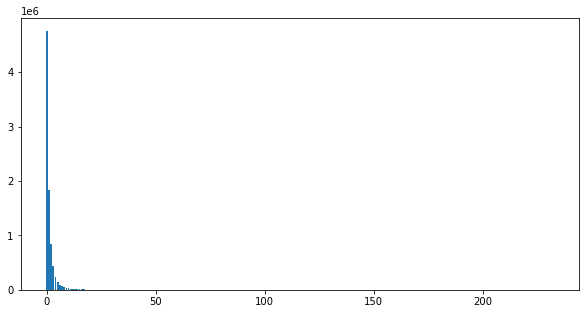

In [22]:

plt.figure(figsize=(10,5))
plt.bar(range(len(df1)),df1['useful'])
plt.show()

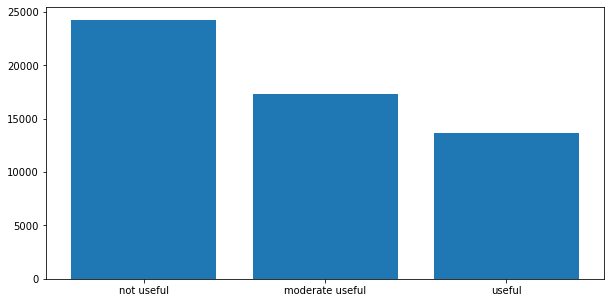

In [24]:
plt.figure(figsize=(10,5))
name_list = ['not useful','moderate useful','useful']
num_list = [24256,17358,13637]
plt.bar(range(len(num_list)), num_list,tick_label=name_list)
plt.show()

In [ ]:
not useful         24256
moderate useful    17358
useful             13637


AttributeError: 'Rectangle' object has no property 'normed'

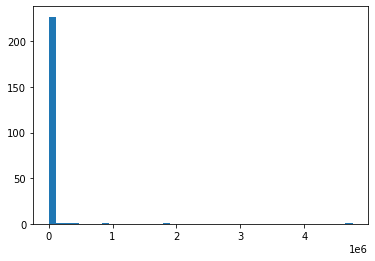

In [7]:
plt.hist(df1, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()

In [4]:
len(Review2)

8635403

In [10]:
Test = Review2.head(50000)

In [20]:
Test1=Test[(Test['useful']> 10)]
Test1_use=Test1.sample(n=56,random_state=1)
len(Test1_use)

56

In [22]:
Test2=Test[(Test['useful']>5)&(Test['useful']<=10)]
Test2_use=Test2.sample(n=80,random_state=1)
len(Test2_use)

80

In [24]:
Test3=Test[(Test['useful']<=5)&(Test['useful']>1)]
Test3_use=Test3.sample(n=64,random_state=1)
len(Test3_use)

64

In [25]:
Test4=Test[(Test['useful']<1)]
Test4_use=Test4.sample(n=100,random_state=1)
len(Test4_use)

100

In [60]:
review_sample = pd.concat([Test1_use, Test2_use, Test3_use, Test4_use], axis=0)
len(review_sample)

300

In [57]:
review_sample['useful_level']=review_sample['useful']

In [64]:
review_sample.loc[review_sample['useful']>10,'useful_level']=4

In [63]:
review_sample.loc[ (review_sample['useful']>5) & (review_sample['useful']<=10) , 'useful_level' ] = 3

In [62]:
review_sample.loc[ (review_sample['useful']>1) & (review_sample['useful']<=5) , 'useful_level' ] = 2

In [61]:
review_sample.loc[review_sample['useful']<=1,'useful_level']=1

In [ ]:
#review_sample['useful_level'][review_sample['useful_level']>10] = 4
#review_sample['useful_level'][review_sample['useful_level']>5] = 4
# https://blog.csdn.net/destiny_python/article/details/78675036


In [45]:
#review_sample.loc[review_sample['useful_level']>5,'useful_level']=='useful3'

#review_sample.loc[ review_sample['useful_level']>1,'useful_level']=='useful2'
review_sample.loc[review_sample['useful']<=1,'useful_level']=1
review_sample.loc[ (review_sample['useful']>1) | (review_sample['useful']<=5) , 'useful_level' ] = 2
review_sample.loc[ (review_sample['useful']>5) | (review_sample['useful']<=10) , 'useful_level' ] = 3
review_sample.loc[review_sample['useful']>10,'useful_level']=4

In [66]:
review_sample.to_csv('review_sample.csv', sep=',', index=False)

In [2]:
review_sample=pd.read_csv('review_sample.csv')

In [3]:
import liwc

In [4]:
review_sample.head(3)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,useful_level
0,38869,MjnHa2qe5_BLKOv2Yk7dxQ,dSVqrbqRoH4_a0CV4TqPzw,zH5SKmxO4-YalZnMMQRPtA,1.0,14,6,1,DO NOT SHOP HERE!!!!!!!!!!!!!!!!!!!! BE FOREW...,2009-10-21 17:14:39,4.0
1,41643,4iKp1TPdLGh6Jcq-wa8DrA,GmHLPpVYrC3ibFwSrhONPw,U5fyW8R622QWtsFrbgwg8Q,5.0,13,2,0,I laughed when my wife told me the double-digi...,2013-01-03 22:19:44,4.0
2,12479,IcSchN-nE9mWCTM5oeBK8g,bo-T1AOS1mR-Xcr-PBBIiA,upY1H63uocaOJm_cBD81ww,2.0,13,1,1,My partner and I were tenants at this property...,2016-03-17 23:14:23,4.0


In [7]:
stri=review_sample.iat[2,8]

In [97]:
re.sub("[^-9A-Za-z ]", "" , review_sample.iat[2,8])

'My partner and I were tenants at this property for a year  The location is perfect--close to the north end across the TD Garden a few steps away from Quincy Marker and a  minute walk to downtown Boston  The concierge is wonderful-- very attentive and engaged with the community  Compared to other buildings this property has relatively decent amenities Management is perhaps the worst The manager and staff do not care about residents they do not respond to requests are unfriendly driven by new tenants rather than keeping existing tenants and are not able to create any feeling of community'

In [10]:
stri1 = review_sample.iat[2,8]

In [11]:
# 先用
s1 = re.sub(r'[^\w\s]','',stri)
s1

'My partner and I were tenants at this property for a year \n\n1 The location is perfectclose to the north end across the TD Garden a few steps away from Quincy Marker and a 15 minute walk to downtown Boston \n\n2 The concierge is wonderful very attentive and engaged with the community \n\n3 Compared to other buildings this property has relatively decent amenities\n\n4 Management is perhaps the worst The manager and staff do not care about residents they do not respond to requests are unfriendly driven by new tenants rather than keeping existing tenants and are not able to create any feeling of community'

In [12]:
# 用这个！！！
s2=re.sub(r'\n[0-9]?(spoilers)?', '',s1)
s2

'My partner and I were tenants at this property for a year  The location is perfectclose to the north end across the TD Garden a few steps away from Quincy Marker and a 15 minute walk to downtown Boston  The concierge is wonderful very attentive and engaged with the community  Compared to other buildings this property has relatively decent amenities Management is perhaps the worst The manager and staff do not care about residents they do not respond to requests are unfriendly driven by new tenants rather than keeping existing tenants and are not able to create any feeling of community'